In [97]:
import pandas as pd
from dateutil.relativedelta import relativedelta
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import datetime

In [106]:
a, b, c = '2010-12-31'.split('-')
datetime.date(int(a), int(b), int(c)).isocalendar()[1]

52

In [196]:
train_raw = train_raw.astype('object')

In [206]:
train_raw.loc[train_raw['Date'] == train_raw['Date'][0], 'Wk'] = [wk] * n

ValueError: Must have equal len keys and value when setting with an ndarray

In [221]:
train_raw.loc[train_raw['Date'] == train_raw['Date'][0], 'Wk'] = wk

ValueError: Must have equal len keys and value when setting with an iterable

In [198]:
# read raw data and extract date column
train_raw = pd.read_csv('https://liangfgithub.github.io/Data/train.csv.zip')
train_raw = train_raw.astype('object')

In [199]:
# Add classifiers for weeks, years
yrs = pd.to_datetime(train_raw['Date']).dt.to_period('Y').unique().year
n_years = len(yrs)
for date in train_raw['Date'].unique():
    wk = np.zeros(52)
    yr = np.zeros(n_years)
    y, m, d = date.split('-')
    wk_idx = datetime.date(int(y), int(m), int(d)).isocalendar()[1]
    yr_idx = np.where(yrs == int(y))[0][0]
    wk[wk_idx] = 1
    yr[yr_idx] = 1
    n = len(train_raw.loc[train_raw['Date'] == date])
    train_raw.loc[train_raw['Date']==date,'Week'] = [wk] * n
    train_raw.loc[train_raw['Date']==date,'Yr'] = [yr] * n

ValueError: Must have equal len keys and value when setting with an ndarray

In [129]:
# training data from 2010-02 to 2011-02
start_date = pd.to_datetime('2010-02-01')
end_date = start_date + relativedelta(months=13)

# split dataset into training / testing
train_ids = (pd.to_datetime(train_raw['Date']) >= start_date) & (pd.to_datetime(train_raw['Date']) < end_date)
train = train_raw.loc[train_ids]
test = train_raw.loc[~train_ids]

# create the initial training data
train.to_csv('train_ini.csv')

# create test.csv
# removes weekly sales
test = test.drop(columns=['Weekly_Sales'])
test.to_csv('test.csv')

# create 10 time-series
num_folds = 10

# month 1 --> 2011-03, and month 20 --> 2012-10.
# Fold 1 : month 1 & month 2, Fold 2 : month 3 & month 4 ...
for i in range(num_folds):
    # filter fold for dates
    start_date = pd.to_datetime('2011-03-01') + relativedelta(months = 2 * i)
    end_date = pd.to_datetime('2011-05-01') + relativedelta(months = 2 * i)
    test_ids = (pd.to_datetime(test['Date']) >= start_date) & (pd.to_datetime(test['Date']) < end_date)
    test_fold = test.loc[test_ids]

    # write fold to a file
    test_fold.to_csv('fold_{}.csv'.format(i + 1))

SyntaxError: invalid syntax (1437877268.py, line 11)

In [10]:
stores = train_raw['Store'].unique()
dept = train_raw['Dept'].unique()
import matplotlib.pyplot as plt

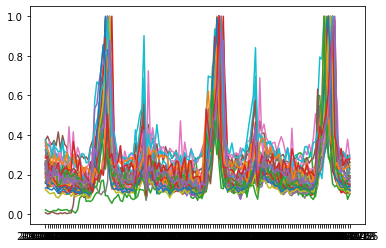

In [21]:
for store in stores:
    dept = 3
    df = train_raw.loc[train_raw['Store']==store]
    df = df.loc[df['Dept'] == dept]

    plt.plot(df['Date'], df['Weekly_Sales']/np.max(df['Weekly_Sales']))

In [ ]:
# We can assume that all stores have more or less the same dynamics. The real differentiator are the departments.

In [53]:
df = train_raw['Date']


In [58]:
df.unique()

array(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
       '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
       '2010-04-02', '2010-04-09', '2010-04-16', '2010-04-23',
       '2010-04-30', '2010-05-07', '2010-05-14', '2010-05-21',
       '2010-05-28', '2010-06-04', '2010-06-11', '2010-06-18',
       '2010-06-25', '2010-07-02', '2010-07-09', '2010-07-16',
       '2010-07-23', '2010-07-30', '2010-08-06', '2010-08-13',
       '2010-08-20', '2010-08-27', '2010-09-03', '2010-09-10',
       '2010-09-17', '2010-09-24', '2010-10-01', '2010-10-08',
       '2010-10-15', '2010-10-22', '2010-10-29', '2010-11-05',
       '2010-11-12', '2010-11-19', '2010-11-26', '2010-12-03',
       '2010-12-10', '2010-12-17', '2010-12-24', '2010-12-31',
       '2011-01-07', '2011-01-14', '2011-01-21', '2011-01-28',
       '2011-02-04', '2011-02-11', '2011-02-18', '2011-02-25',
       '2011-03-04', '2011-03-11', '2011-03-18', '2011-03-25',
       '2011-04-01', '2011-04-08', '2011-04-15', '2011-

In [75]:
pd.to_datetime(train_ini['Date']).dt.to_period('W')

0     2010-02-01/2010-02-07
1     2010-02-08/2010-02-14
2     2010-02-15/2010-02-21
3     2010-02-22/2010-02-28
4     2010-03-01/2010-03-07
5     2010-03-08/2010-03-14
6     2010-03-15/2010-03-21
7     2010-03-22/2010-03-28
8     2010-03-29/2010-04-04
9     2010-04-05/2010-04-11
10    2010-04-12/2010-04-18
11    2010-04-19/2010-04-25
12    2010-04-26/2010-05-02
13    2010-05-03/2010-05-09
14    2010-05-10/2010-05-16
15    2010-05-17/2010-05-23
16    2010-05-24/2010-05-30
17    2010-05-31/2010-06-06
18    2010-06-07/2010-06-13
19    2010-06-14/2010-06-20
20    2010-06-21/2010-06-27
21    2010-06-28/2010-07-04
22    2010-07-05/2010-07-11
23    2010-07-12/2010-07-18
24    2010-07-19/2010-07-25
25    2010-07-26/2010-08-01
26    2010-08-02/2010-08-08
27    2010-08-09/2010-08-15
28    2010-08-16/2010-08-22
29    2010-08-23/2010-08-29
30    2010-08-30/2010-09-05
31    2010-09-06/2010-09-12
32    2010-09-13/2010-09-19
33    2010-09-20/2010-09-26
34    2010-09-27/2010-10-03
35    2010-10-04/201

In [83]:
train_ini = pd.read_csv("train_ini.csv",parse_dates=['Date'])
dates = train_ini['Date'];

#train_ini['Date'] = (dates - dates.min()).dt.days
train_ini['IsHoliday'].apply(pd.to_numeric)
store=1
dept=1
train_ini =  train_ini.loc[train_ini['Store']==store]
train_ini = train_ini.loc[train_ini['Dept'] == dept]

xdata = train_ini[['Store', 'Dept', 'Date', 'IsHoliday']].values
ydata = train_ini['Weekly_Sales'].values

#boost = GradientBoostingRegressor(n_estimators=100)
#boost.fit(xdata,ydata)

In [89]:
train_ini.loc[train_ini['Date']=='2010-02-05','Yr'] = 2010

In [90]:
train_ini

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Yr
0,0,1,1,2010-02-05,24924.50,False,2010.0
1,1,1,1,2010-02-12,46039.49,True,NaN
2,2,1,1,2010-02-19,41595.55,False,NaN
3,3,1,1,2010-02-26,19403.54,False,NaN
4,4,1,1,2010-03-05,21827.90,False,NaN
5,5,1,1,2010-03-12,21043.39,False,NaN
6,6,1,1,2010-03-19,22136.64,False,NaN
7,7,1,1,2010-03-26,26229.21,False,NaN
8,8,1,1,2010-04-02,57258.43,False,NaN
9,9,1,1,2010-04-09,42960.91,False,NaN


In [31]:
(ydata - boost.predict(xdata))/ ydata

array([-0.00680623,  0.00973818,  0.01130268, -0.02509   ,  0.00665118,
       -0.03038145, -0.00692524, -0.00669285,  0.02863766,  0.00168175,
        0.00051077, -0.06126701, -0.03499931,  0.01144156,  0.07409526,
       -0.08725386, -0.03960195,  0.05231195, -0.00011853, -0.02610477,
       -0.01903836, -0.01876259,  0.04696965,  0.01707875, -0.04572928,
       -0.04427644,  0.05631569, -0.04122829, -0.02775131, -0.0242543 ,
       -0.00246107,  0.00091605,  0.03228497, -0.03348647,  0.00276382,
        0.01148965,  0.02567624, -0.02907241,  0.03727611, -0.00200275,
       -0.01333214, -0.01315334, -0.03604444, -0.00449314,  0.00256088,
        0.00860926,  0.02474773,  0.00885099, -0.06595667, -0.00769413,
       -0.00875346, -0.0024877 ,  0.0100609 ,  0.00642453,  0.01306196,
       -0.02482629])

In [4]:
def mypredict(train, next_fold, t):

    tmp = pd.DataFrame()

    data_cols = ['Store', 'Dept', 'IsHoliday', 'Weekly_Sales']
    x_cols = ['Store', 'Dept', 'IsHoliday']

    if isinstance(next_fold, type(None)):
        dates = train['Date']
        tmp['Date'] = (dates - dates.min())
        tmp[data_cols] = train[data_cols]

    else:
        next_fold = next_fold[data_cols]
        tmp = pd.concat([tmp,next_fold])

    xtrain = tmp[x_cols]
    ytrain = tmp['Weekly_Sales']

    boost = GradientBoostingRegressor()

    boost.fit(xtrain, ytrain)

    # FIXME
    ypred = boost.predict(test)

    return ypred


mypredict(train_ini, None, 0)




/home/ooblack/miniconda3/envs/viz/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Date
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: could not convert string to float: '2011-03-04'

In [ ]:
train = pd.read_csv('train_ini.csv', parse_dates=['Date'])
test = pd.read_csv('test.csv', parse_dates=['Date'])

# save weighed mean absolute error WMAE
n_folds = 10
next_fold = None
wae = []

# time-series prediction
for t in range(1, n_folds+1):
    print(f'Fold{t}...')

    # *** THIS IS YOUR PREDICTION FUNCTION ***
    test_pred = mypredict(train, next_fold, t)

    # Load fold file
    # You should add this to your training data in the next call to mypredict()
    fold_file = 'fold_{t}.csv'.format(t=t)
    next_fold = pd.read_csv(fold_file, parse_dates=['Date'])

    # extract predictions matching up to the current fold
    scoring_df = next_fold.merge(test_pred, on=['Date', 'Store', 'Dept'], how='left')

    # extract weights and convert to numpy arrays for wae calculation
    weights = scoring_df['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1).to_numpy()
    actuals = scoring_df['Weekly_Sales'].to_numpy()
    preds = scoring_df['Weekly_Pred'].fillna(0).to_numpy()

    wae.append((np.sum(weights * np.abs(actuals - preds)) / np.sum(weights)).item())

print(wae)
print(sum(wae)/len(wae))